# Bike Sharing Assignment

### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.<br><br>

Essentially the company wants :<br><br>

1. To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19, by creating a linear model.<br>
2. To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bikes.<br>
3. To know the accuracy of the model, i.e. How well those variables describe the bike demands<br><br>

They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

## Step 1: Reading and Understanding the Data

### Reading the Bike sharing dataset

In [156]:
import warnings
warnings.filterwarnings('ignore')

In [157]:
import numpy as np 
import pandas as pd

In [158]:
###Checking out the dataset
df1_bike = pd.read_csv('day-2.csv')
df1_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [159]:
df1_bike.shape

(730, 16)

In [160]:
###Looking into all the cols present
df1_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [161]:
df1_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [162]:
df1_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No null values present in any column

##### Let's check for any duplicates present 

In [163]:
df1_bike_dup = df1_bike.copy()
df1_bike_dup.drop_duplicates(subset=None,inplace=True)
df1_bike_dup.shape


(730, 16)

We can infer that there are no null values or any duplicate values present

In [164]:
df1_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Inspecting above columns , column 'instant' is not needed as its another column to take care of indexes , column 'dteday' also can be ignored as there are already seperate columns wrt to year and month , we can also ignored column 'casual' & 'registered' as the given study is wrt to finding total count of bikes and not wrt to any category

In [165]:
df2_bikes =  df1_bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [166]:
df2_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Step 2 : Visulising the data 

In [167]:
import matplotlib.pyplot as plt 
import seaborn as sns

I have listed below the observations we will be making going forward
* Check if all the variables are linearly related or not
* Checking for any multicollinearity that exists 
* Indentify if some predictors have strong association with any outcomes

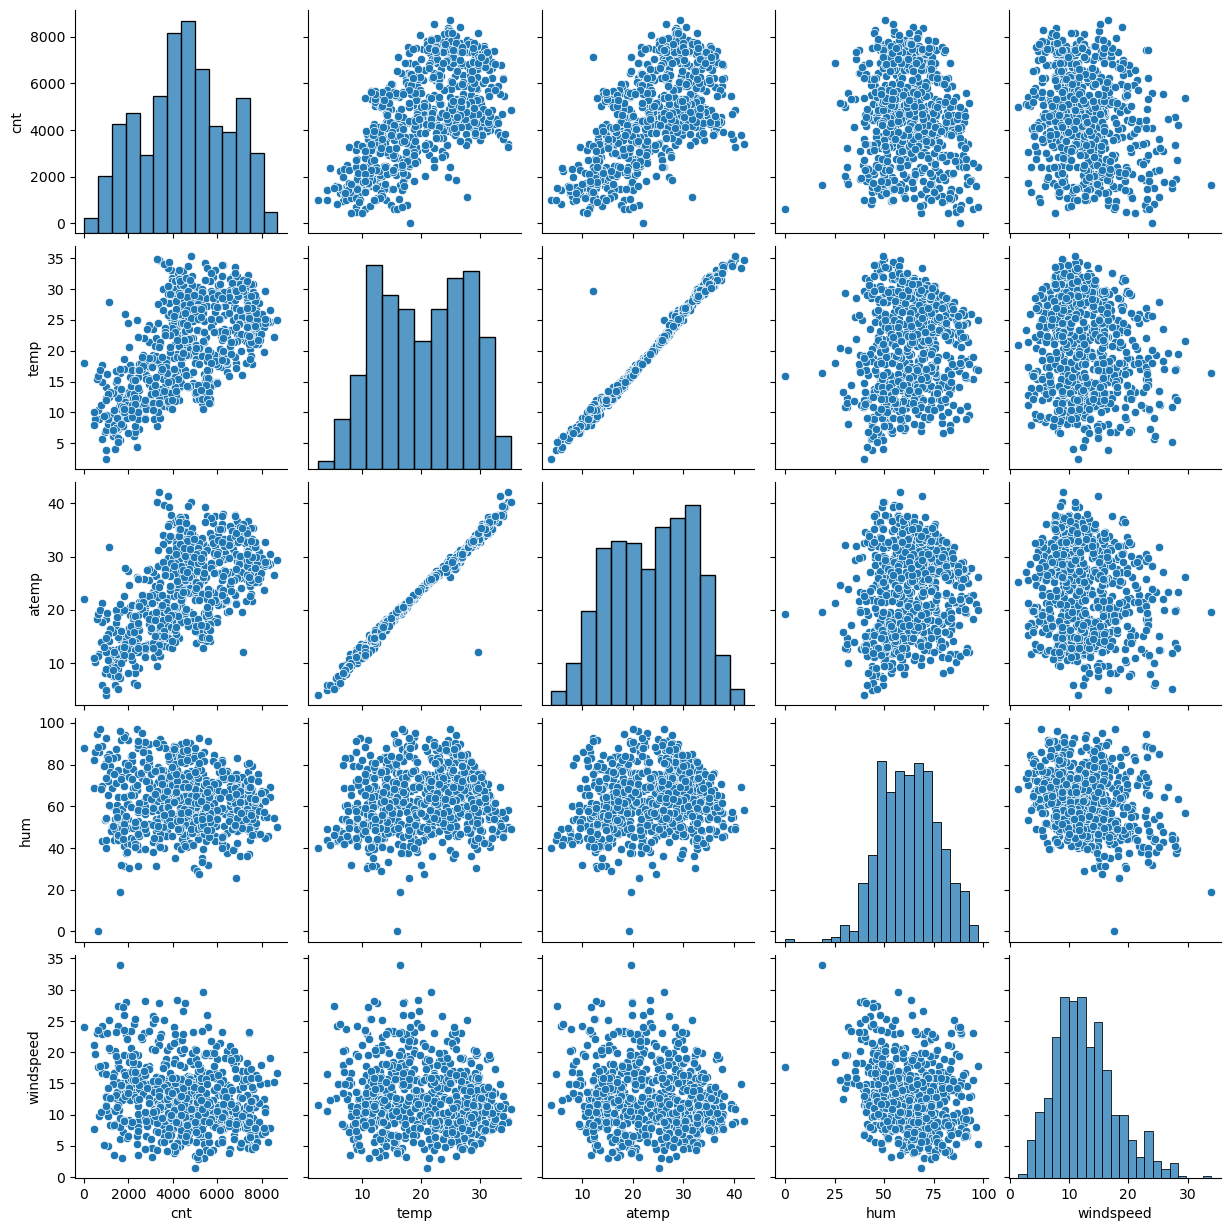

In [168]:
sns.pairplot(data = df2_bikes,vars=['cnt','temp','atemp','hum','windspeed'])

### Conclusion
Its very clear from the above pairplot that there exists independent variables like atemp , temp which shows positive corelation with target variable cnt

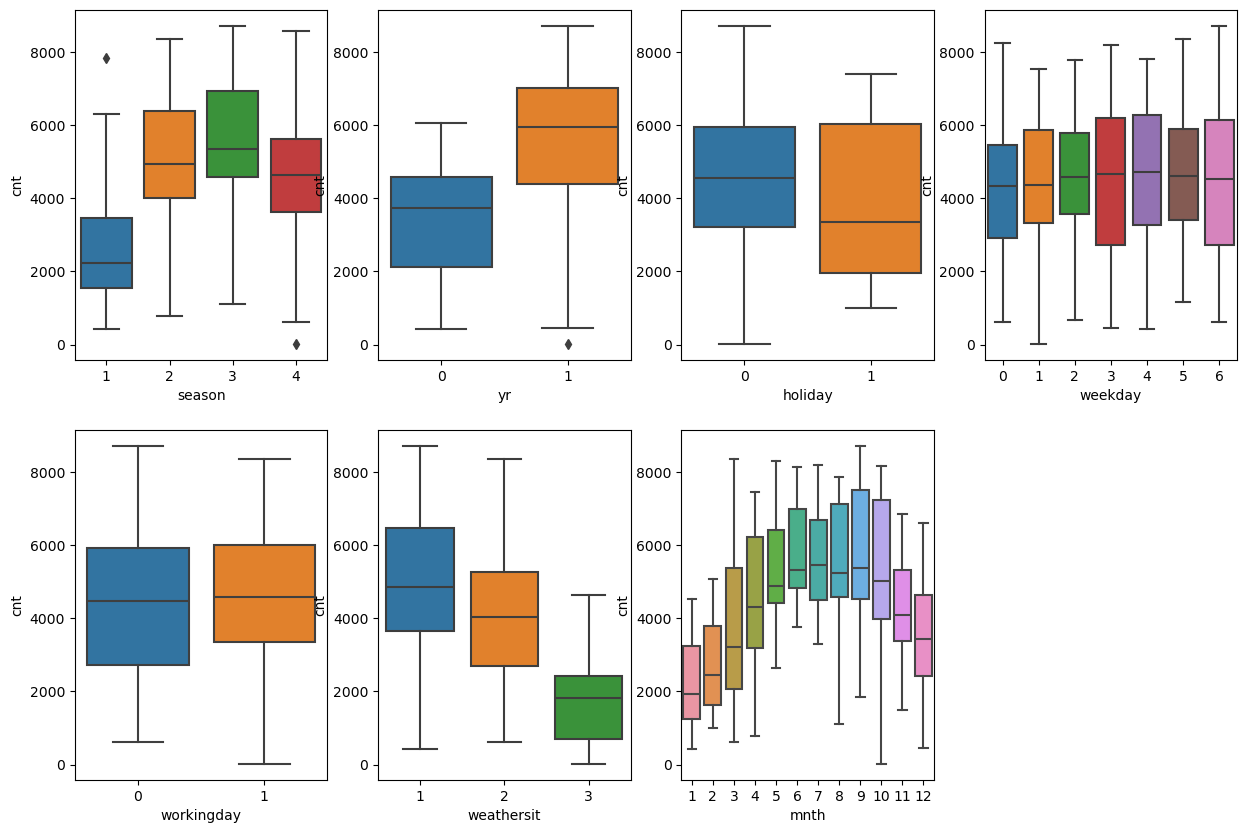

In [169]:
plt.figure(figsize=(15, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df2_bikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df2_bikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df2_bikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df2_bikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df2_bikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df2_bikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = df2_bikes)
plt.show()

### Observations 

* For variable season, we can clearly see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring. <br>
* For variable year.The year 2019 had a higher count of users as compared to the year 2018.<br>
* For variable holiday.The count of users is less during the holidays.<br>
* For variable weekday.The count of rentals is almost even throughout the week.<br>
* For the variable "Workingday" , in the boxplot we can see those maximum bookings happening between 4000 and 6000, that is the median count of users is constant almost throughout the week. There is not much of difference in booking whether its working day or not.<br>
* For the variable weathersit.There are no users when there is heavy rain/ snow indicating that this weather is quite adverse. Highest count was seen when the weather situation was Clear, Partly Cloudy.<br>
* For the variable month.The number of rentals peaked in September. This observation is consistent with the observations made regarding the weather. As a result of the typical substantial snowfall in December, rentals may have declined.



## Step 3: Data Preparation

Mapping few categorical values to categorical string values

In [170]:
import calendar
df2_bikes['mnth']=df2_bikes['mnth'].apply(lambda x: calendar.month_abbr[x])

In [171]:
#map season
df2_bikes['season']=df2_bikes.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})


In [172]:
#map weather
df2_bikes['weathersit']=df2_bikes.season.map({1:'Clear',2:'Misty & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [173]:
df2_bikes.weekday = df2_bikes.weekday.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [174]:
df2_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,NaN,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,NaN,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,NaN,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,NaN,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,NaN,9.305237,11.46350,43.6957,12.522300,1600


### Creating Dummy variables

In [175]:
#dummy = df2_bikes[['season','mnth','weekday','weathersit']]

In [176]:
#dummy = pd.get_dummies(dummy,drop_first=True)

In [177]:
#Adding dummy with original dataset
# df2_bikes = pd.concat([dummy,df2_bikes],axis=1)
# df2_bikes.head()

In [178]:
#Drop other columns after insertion of dummy cols 
dummy = df2_bikes[['season', 'mnth', 'weekday', 'weathersit']]
dummy = pd.get_dummies(dummy, drop_first=True, dtype=int)

# Concatenate the dummy variables with the original DataFrame
df2_bikes = pd.concat([dummy, df2_bikes.drop(['season', 'weathersit', 'weekday', 'mnth'], axis=1)], axis=1)

# Display the modified DataFrame
print(df2_bikes.head())

   season_Spring  season_Summer  season_Winter  mnth_Aug  mnth_Dec  mnth_Feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  ...  weekday_Tuesday  \
0         1         0         0         0  ...                0   
1         1         0         0         0  ...                0   
2         1         0         0         0  ...                0   
3         1         0         0         0  ...                1   
4         1         0         0         0  ...                0   

   weekday_Wednesday  yr  holiday  workingday       temp     atemp      hum  \
0                  0   0        0    

In [179]:
df2_bikes.shape

(730, 28)

In [180]:
df2_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_Spring      730 non-null    int64  
 1   season_Summer      730 non-null    int64  
 2   season_Winter      730 non-null    int64  
 3   mnth_Aug           730 non-null    int64  
 4   mnth_Dec           730 non-null    int64  
 5   mnth_Feb           730 non-null    int64  
 6   mnth_Jan           730 non-null    int64  
 7   mnth_Jul           730 non-null    int64  
 8   mnth_Jun           730 non-null    int64  
 9   mnth_Mar           730 non-null    int64  
 10  mnth_May           730 non-null    int64  
 11  mnth_Nov           730 non-null    int64  
 12  mnth_Oct           730 non-null    int64  
 13  mnth_Sep           730 non-null    int64  
 14  weekday_Monday     730 non-null    int64  
 15  weekday_Saturday   730 non-null    int64  
 16  weekday_Sunday     730 non

### Step 4: Splitting data into training and testing set

In [181]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df2_bikes,train_size=0.7,random_state=100)
print(train.shape)
print(test.shape)

(510, 28)
(220, 28)


### Step 5: Rescaling the image

In [182]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [183]:
num_vars = ['cnt','hum','windspeed','atemp']
train[num_vars]=scaler.fit_transform(train[num_vars])

In [184]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,29.246653,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,16.980847,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,10.489153,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,15.443347,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,13.803347,0.318819,0.751824,0.380981,0.191095


In [185]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.131373,0.158824,0.507843,0.025490,0.676471,20.108257,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.338139,0.365870,0.500429,0.157763,0.468282,7.431626,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.606865,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,20.277923,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,26.615847,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,1.000000,1.000000,1.000000,1.000000


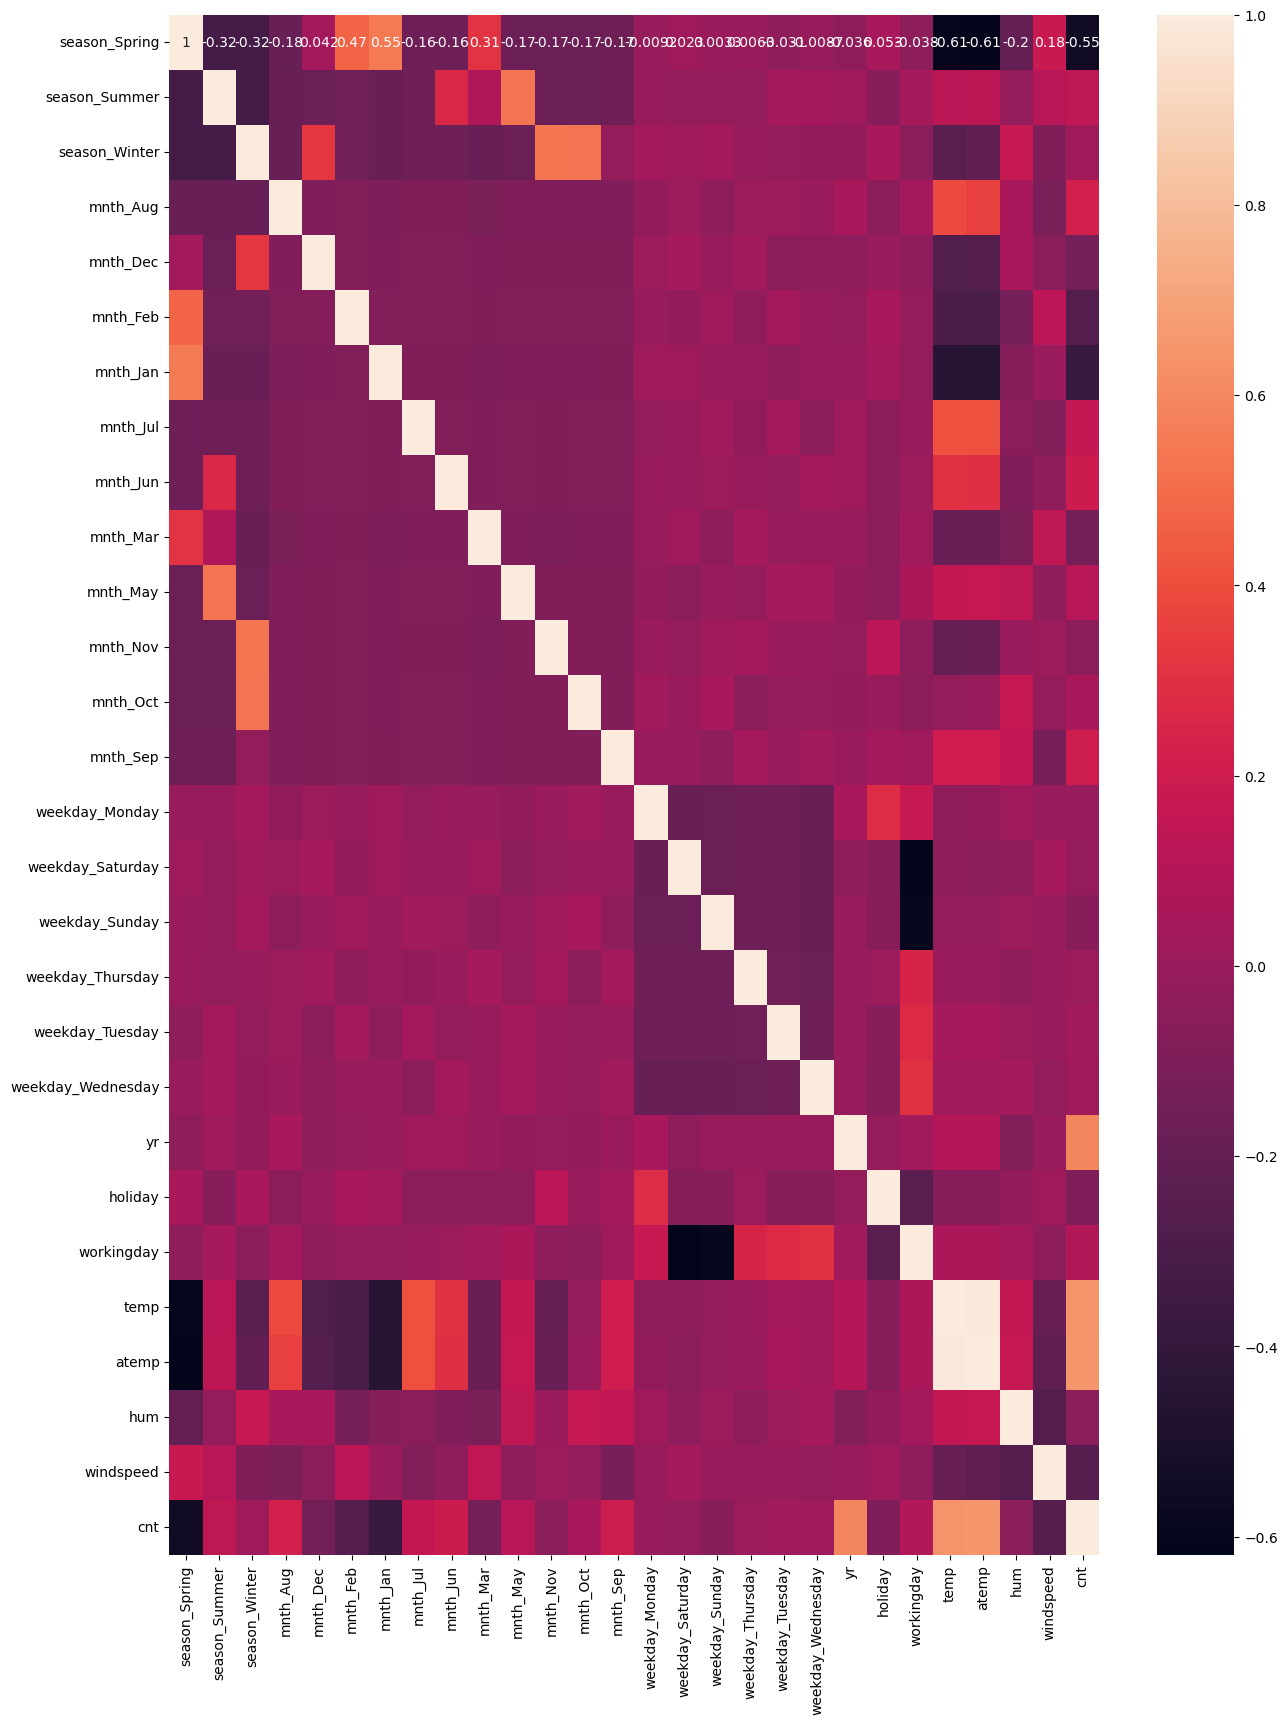

In [186]:
plt.figure(figsize=(15,20))
sns.heatmap(train.corr(), annot=True)
plt.show()

Temp and atemp clearly have a correlation to target variable cnt. Let's go ahead to build a model to check with other variables

Dividing into X and Y for model building

In [187]:
y_train = train.pop('cnt')
X_train = train

In [188]:
y_train.shape

(510,)

### Step 6: Building a linear model

In [189]:
#RFE approach for feature selection and statsmodel for building the model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [190]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [191]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', False, 4),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 3),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 12),
 ('mnth_May', True, 1),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 6),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 8),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 9),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 10),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [192]:
col = X_train.columns[rfe.support_]
col

Index(['season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Feb', 'mnth_Jan',
       'mnth_May', 'mnth_Sep', 'weekday_Saturday', 'weekday_Sunday', 'yr',
       'holiday', 'workingday', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [193]:
X_train.columns[~rfe.support_]
col

Index(['season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Feb', 'mnth_Jan',
       'mnth_May', 'mnth_Sep', 'weekday_Saturday', 'weekday_Sunday', 'yr',
       'holiday', 'workingday', 'atemp', 'hum', 'windspeed'],
      dtype='object')

#### Building model using statsmodel for detailed statistics

In [194]:
X_train_rfe = X_train[col]
#adding const to stop stats model starting from origin
import statsmodels.api as sm 
X_train_lm = sm.add_constant(X_train_rfe)

In [195]:
X_train_lm.head()

,const,season_Summer,season_Winter,mnth_Aug,mnth_Feb,mnth_Jan,mnth_May,mnth_Sep,weekday_Saturday,weekday_Sunday,yr,holiday,workingday,atemp,hum,windspeed
576,1.0,0,0,0,0,0,0,0,0,0,1,0,1,0.766351,0.725633,0.264686
426,1.0,0,0,0,0,0,0,0,1,0,1,0,0,0.438975,0.640189,0.255342
728,1.0,0,0,0,0,0,0,0,0,1,1,0,0,0.200348,0.498067,0.663106
482,1.0,1,0,0,0,0,0,0,1,0,1,0,0,0.391735,0.504508,0.188475
111,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0.318819,0.751824,0.380981


In [196]:
lm_1 = sm.OLS(y_train,X_train_lm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     157.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          6.08e-172
Time:                        16:51:56   Log-Likelihood:                 471.22
No. Observations:                 510   AIC:                            -912.4
Df Residuals:                     495   BIC:                            -848.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2610      0.025     10.331      0.000       0.211       0.311
season_Summer        0.0790      0.015      5.444      0.000       0.051       0.108
season_Winter        0.1253      0.014      8.959      0.000       0.098       0.153
mnth_Aug             0.0631      0.018      3.593      0.000       0.029       0.098
mnth_Feb            -0.0262      0.022     -1.216      0.224      -0.068       0.016
mnth_Jan            -0.0452      0.021     -2.141      0.033      -0.087      -0.004
mnth_May             0.0338      0.019      1.794      0.073      -0.003       0.071
mnth_Sep             0.1175      0.018      6.657      0.000       0.083       0.152
weekday_Saturday     0.0990      0.012      8.129      0.000       0.075       0.123
weekday_Sunday       0.0582      0.013      4.601      0.000       0.033       0.083
yr                   0.2312      0.009     26.367      0.000       0.214       0.248
holiday              0.0117      0.023      0.512      0.609      -0.033       0.057
workingday           0.0921      0.010      9.337      0.000       0.073       0.111
atemp                0.5524      0.031     18.073      0.000       0.492       0.612
hum                 -0.3510      0.033    -10.780      0.000      -0.415      -0.287
windspeed           -0.2161      0.027     -7.876      0.000      -0.270      -0.162
==============================================================================
Omnibus:                       95.728   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.398
Skew:                          -0.889   Prob(JB):                     4.77e-62
Kurtosis:                       6.183   Cond. No.                     4.10e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.43e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Checking VIF for multicollinearity

In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [198]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
11,workingday,35.23
7,weekday_Saturday,8.66
8,weekday_Sunday,8.31
10,holiday,2.27
12,atemp,2.26
0,season_Summer,2.10
1,season_Winter,1.95
4,mnth_Jan,1.93
3,mnth_Feb,1.55
5,mnth_May,1.47


In general we want VIF to be less than 5. We will drop feature workingday which has highest VIF of 35.23

In [199]:
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

#### Model 2

In [200]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     157.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          6.08e-172
Time:                        16:51:56   Log-Likelihood:                 471.22
No. Observations:                 510   AIC:                            -912.4
Df Residuals:                     495   BIC:                            -848.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3530      0.031     11.332      0.000       0.292       0.414
season_Summer        0.0790      0.015      5.444      0.000       0.051       0.108
season_Winter        0.1253      0.014      8.959      0.000       0.098       0.153
mnth_Aug             0.0631      0.018      3.593      0.000       0.029       0.098
mnth_Feb            -0.0262      0.022     -1.216      0.224      -0.068       0.016
mnth_Jan            -0.0452      0.021     -2.141      0.033      -0.087      -0.004
mnth_May             0.0338      0.019      1.794      0.073      -0.003       0.071
mnth_Sep             0.1175      0.018      6.657      0.000       0.083       0.152
weekday_Saturday     0.0069      0.012      0.565      0.572      -0.017       0.031
weekday_Sunday      -0.0338      0.013     -2.686      0.007      -0.059      -0.009
yr                   0.2312      0.009     26.367      0.000       0.214       0.248
holiday             -0.0804      0.028     -2.894      0.004      -0.135      -0.026
atemp                0.5524      0.031     18.073      0.000       0.492       0.612
hum                 -0.3510      0.033    -10.780      0.000      -0.415      -0.287
windspeed           -0.2161      0.027     -7.876      0.000      -0.270      -0.162
==============================================================================
Omnibus:                       95.728   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.398
Skew:                          -0.889   Prob(JB):                     4.77e-62
Kurtosis:                       6.183   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
12,hum,14.90
11,atemp,10.80
13,windspeed,3.93
0,season_Summer,2.65
1,season_Winter,2.34
9,yr,2.06
4,mnth_Jan,1.70
2,mnth_Aug,1.59
5,mnth_May,1.58
3,mnth_Feb,1.44


In [202]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

### Model 3

In [203]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train, X_train_lm).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     130.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.76e-150
Time:                        16:51:56   Log-Likelihood:                 417.44
No. Observations:                 510   AIC:                            -806.9
Df Residuals:                     496   BIC:                            -747.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1379      0.027      5.191      0.000       0.086       0.190
season_Summer        0.0729      0.016      4.530      0.000       0.041       0.105
season_Winter        0.0928      0.015      6.119      0.000       0.063       0.123
mnth_Aug             0.0483      0.019      2.487      0.013       0.010       0.087
mnth_Feb            -0.0322      0.024     -1.350      0.178      -0.079       0.015
mnth_Jan            -0.0627      0.023     -2.680      0.008      -0.109      -0.017
mnth_May             0.0038      0.021      0.184      0.854      -0.037       0.044
mnth_Sep             0.0897      0.019      4.626      0.000       0.052       0.128
weekday_Saturday     0.0105      0.014      0.773      0.440      -0.016       0.037
weekday_Sunday      -0.0349      0.014     -2.494      0.013      -0.062      -0.007
yr                   0.2408      0.010     24.870      0.000       0.222       0.260
holiday             -0.0713      0.031     -2.313      0.021      -0.132      -0.011
atemp                0.5156      0.034     15.292      0.000       0.449       0.582
windspeed           -0.1604      0.030     -5.362      0.000      -0.219      -0.102
==============================================================================
Omnibus:                      107.594   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.328
Skew:                          -1.024   Prob(JB):                     7.42e-65
Kurtosis:                       6.115   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
11,atemp,5.17
12,windspeed,3.76
0,season_Summer,2.50
9,yr,2.06
1,season_Winter,1.59
2,mnth_Aug,1.58
5,mnth_May,1.57
6,mnth_Sep,1.30
3,mnth_Feb,1.25
4,mnth_Jan,1.24


Now that VIF and p-values are in acceptable range we can accet this model

### Step 7: Residual Analysis of the train data

In [205]:
y_train_pred = lm_3.predict(X_train_lm)

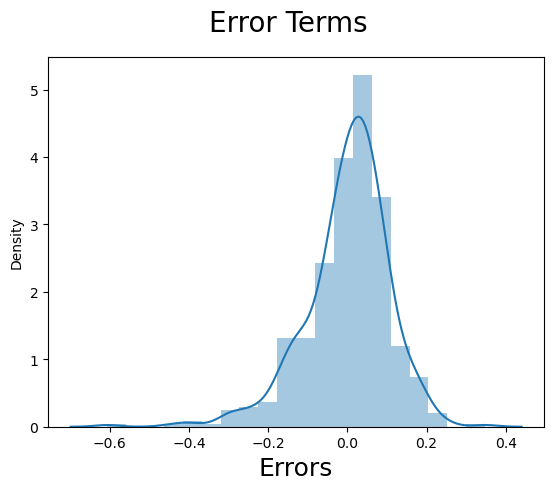

In [206]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

Error terms are centered around 0 and also it is following normal distribution in accordance to linear regression

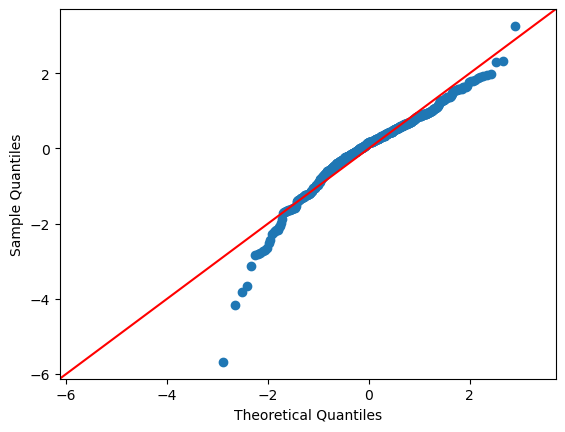

In [207]:
###qqplot for another verification of above stated conclusion
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

## Step 8: Predictions Using the Final Model

In [208]:
num_vars = ['cnt','hum','windspeed','atemp']

test[num_vars] = scaler.transform(test[num_vars])

In [209]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.168182,0.100000,0.481818,0.036364,0.700000,20.808400,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.374881,0.300684,0.500809,0.187620,0.459303,7.672796,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.957390,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14.119375,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,20.790424,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,27.299153,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,34.815847,0.980934,1.002146,0.807474,0.963300


In [210]:
y_test = test.pop('cnt')
X_test = test

In [211]:
X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = lm_3.predict(X_test)

In [212]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.7733781812126994
r2_score of test dataset 0.7508224126564285


r_squared on the test set is 0.773 and the r-squared on the trained set 0.750 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

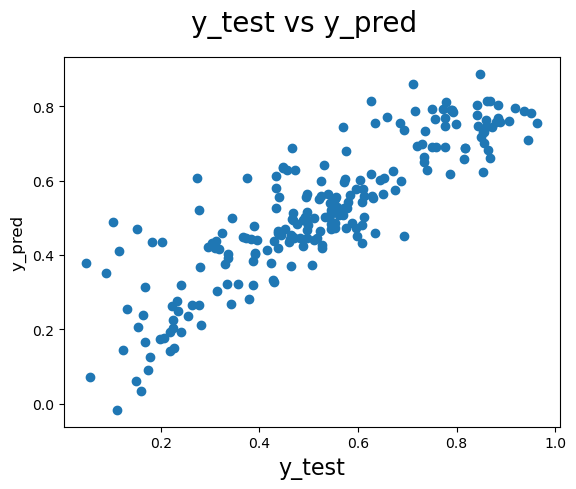

In [213]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 16)                          
plt.ylabel('y_pred', fontsize = 12)

In [214]:
param = pd.DataFrame(lm_3.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,14))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
12,atemp,0.515622
10,yr,0.240787
0,const,0.137850
2,season_Winter,0.092758
7,mnth_Sep,0.089666
1,season_Summer,0.072936
3,mnth_Aug,0.048341
8,weekday_Saturday,0.010489
6,mnth_May,0.003813


### Final Conclusions :

By using above scatter plot, equation for our best fitted line is 

0.1378 + atemp*0.5156 + yr*0.2407 + season_Winter*0.0927 + mnth_Sep*0.08966 + season_Summer*0.0729 + mnth_Aug*0.0483 + weekday_Saturday*0.0104 + mnth_May*0.0038

All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.

All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 77% of bike demand.<br>

Based on final model top three features contributing significantly towards explaining the demand are:<br><br>

Temperature (0.0.515622)<br>

year (0.240787)<br>

Hence, it can be clearly concluded that the variables temperature , season/ weather situation and month are significant in predicting the demand for shared bikes<br>

## Recommendations for the Company:

The months - Jan,Feb,May,Sep should be considered by the company as they have a higher demand as compared to other months.<br>
With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.<br>
Develop targeted marketing and pricing strategies for different seasons, particularly emphasizing promotions during Summer and Winter<br>
mplement weather-specific promotions or incentives to encourage bike usage during favorable weather conditions, addressing the impact of temp and windspeed.<br>
During the Winter season the demand rises, hence it should be well prepared to meet the high demand.<br>
Holiday time seems to be least interesting for biking, little motavation and marketing might help here.<br>